### OMP for SEM
Although we are predominantly focused on VAR models, let us consider briefly whether the OMP method is competitive for SEM models as well. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import OrthogonalMatchingPursuit

In [2]:
# generate SEM
import sys
sys.path.append("..")

from notears.notears.notears import linear
from notears.notears.notears import utils
import helper.helper as h
import helper.methods as m

from importlib import reload  # Python 3.4+

In [118]:
reload(h);
reload(m)
reload(linear)
reload(utils)

<module 'notears.notears.notears.utils' from '..\\notears\\notears\\notears\\utils.py'>

### Generate Data

True W:
[[ 0.    0.78  0.    0.    0.    0.    0.97  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   -0.86  0.    0.97  0.  ]
 [ 0.    0.    0.    0.    0.97  0.    0.94  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.77  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.79  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [-0.83  0.    0.    0.    0.   -0.98  0.    0.    0.    0.  ]].



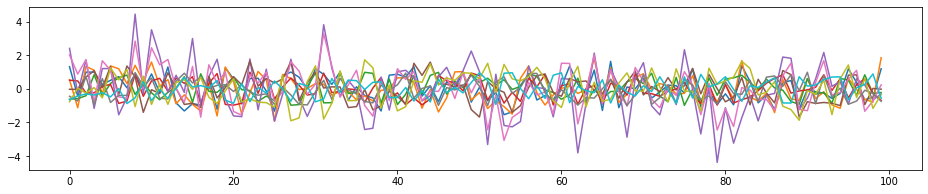

In [130]:
# set random seed
# utils.set_random_seed(1)

# print W
T, n, s0, graph_type, sem_type = 100, 10, 10, 'ER', 'uniform'
W_true = utils.simulate_parameter(utils.simulate_dag(n, s0, graph_type), w_ranges = ((-1.0, -0.75), (0.75, 1.0)))
print(f"True W:\n{np.round(W_true, 2)}.\n")

# plot X
X = utils.simulate_linear_sem(W_true, T, sem_type)
plt.figure(figsize=(16, 3))
plt.plot(X);

# zero - mean
X_a = X - np.mean(X, axis = 0)

### NOTEARS
Parameters of interest:
- $\lambda_1$: Regularization parameter.
- $\texttt{w\_threshold}$: Filters out small values.

In [131]:
W_NOTEARS, h_val = linear.notears_linear(X, lambda1=0.0, loss_type='l2', w_threshold = 3e-1, h_tol = 1e-16, verbose = False)
print(f"NOTEARS:\n{np.round(W_NOTEARS, 1)}.\nEdges: {len(np.flatnonzero(W_NOTEARS))}.")

NOTEARS:
[[ 0.   0.8  0.   0.   0.   0.   0.8  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.8  0.   1.2  0. ]
 [ 0.   0.   0.   0.   0.7  0.   1.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.9  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.8  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-1.   0.   0.   0.   0.  -0.9  0.   0.   0.   0. ]].
Edges: 10.


### DAG-OMP
Parameter of interest:
- $\texttt{tol}$: Minimum gain required to include coefficient.

In [135]:
reload(m);
W_OMP, Ws, mses, max_gains = m._OMP_SEM(X, max_coefs = 100, tol = 2.0, verbose = False, output = True)
print(f"OMP:\n{np.round(W_OMP, 1)}.\n")

tpr, tnr, fpr, acc, shd, mse, rsq = h.score(X, W_OMP, W_true, is_sem = True, printing = False);
print(f"OMP Scores.\tTPR: {round(tpr, 3)},\tTNR: {round(tnr, 3)},\tFPR: {round(fpr, 3)},\tAcc: {round(acc, 3)},\tSHD: {utils.count_accuracy(W_true, W_OMP != 0)['shd']},\tMSE: {round(mse, 3)},\tR-SQ: {round(rsq, 3)}.")

OMP:
[[ 0.   0.8  0.   0.   0.   0.   0.9  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.7  0.   1.2  0. ]
 [ 0.   0.   0.   0.   0.8  0.   1.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.8  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.8  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-1.   0.   0.   0.   0.  -1.   0.   0.   0.   0. ]].

OMP Scores.	TPR: 1.0,	TNR: 1.0,	FPR: 0.0,	Acc: 1.0,	SHD: 0,	MSE: 3.282,	R-SQ: 0.604.


### Compare Scores

In [136]:
tpr, tnr, fpr, acc, shd, mse, rsq = h.score(X, W_OMP, W_true, is_sem = True, printing = False);
print(f"OMP Scores.\tTPR: {round(tpr, 3)},\tTNR: {round(tnr, 3)},\tFPR: {round(fpr, 3)},\tAcc: {round(acc, 3)},\tSHD: {utils.count_accuracy(W_true, W_OMP != 0)['shd']},\tMSE: {round(mse, 3)},\tR-SQ: {round(rsq, 3)}.")
tpr, tnr, fpr, acc, shd, mse, rsq = h.score(X, W_NOTEARS, W_true, is_sem = True, printing = False);
print(f"NOTEARS Scores.\tTPR: {round(tpr, 3)},\tTNR: {round(tnr, 3)},\tFPR: {round(fpr, 3)},\tAcc: {round(acc, 3)},\tSHD: {utils.count_accuracy(W_true, W_NOTEARS != 0)['shd']},\tMSE: {round(mse, 3)},\tR-SQ: {round(rsq, 3)}.")

OMP Scores.	TPR: 1.0,	TNR: 1.0,	FPR: 0.0,	Acc: 1.0,	SHD: 0,	MSE: 3.282,	R-SQ: 0.604.
NOTEARS Scores.	TPR: 1.0,	TNR: 1.0,	FPR: 0.0,	Acc: 1.0,	SHD: 0,	MSE: 3.305,	R-SQ: 0.601.


### Analyse OMP for SEM

In [13]:
def optimal_threshold(W_true, Ws, max_gains):
    """
       Computes the range of threshold (thresh_max, thresh_min],
       such that OMP(X, threshold) yields the structure of W_true.
    """
    
    # get bin of true
    B_true = W_true.copy()
    B_true[B_true != 0] = 1
    
    for i, W in enumerate(Ws):
        # get bin of W_i
        W[W != 0] = 1
        
        # check perfect match
        if (W == B_true).all():
            # optimal threshold can be found in max_gains
            return (max_gains[i], max_gains[i + 1])
        
    return None

threshold_range = optimal_threshold(W_true, Ws, max_gains)

if threshold_range:
    print(f"W_true found back using OMP with threshold in ({round(threshold_range[0], 3)}, {round(threshold_range[1], 3)}].")
else:
    print(f"No threshold range found such that OMP recovers W_true.")

W_true found back using OMP with threshold in (8.864, 1.622].


40.60557604229098
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[5]
 [7]]
34.83512233696947
[[ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[0]
 [5]]
17.423298148561383
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 

TypeError: 'NoneType' object is not subscriptable

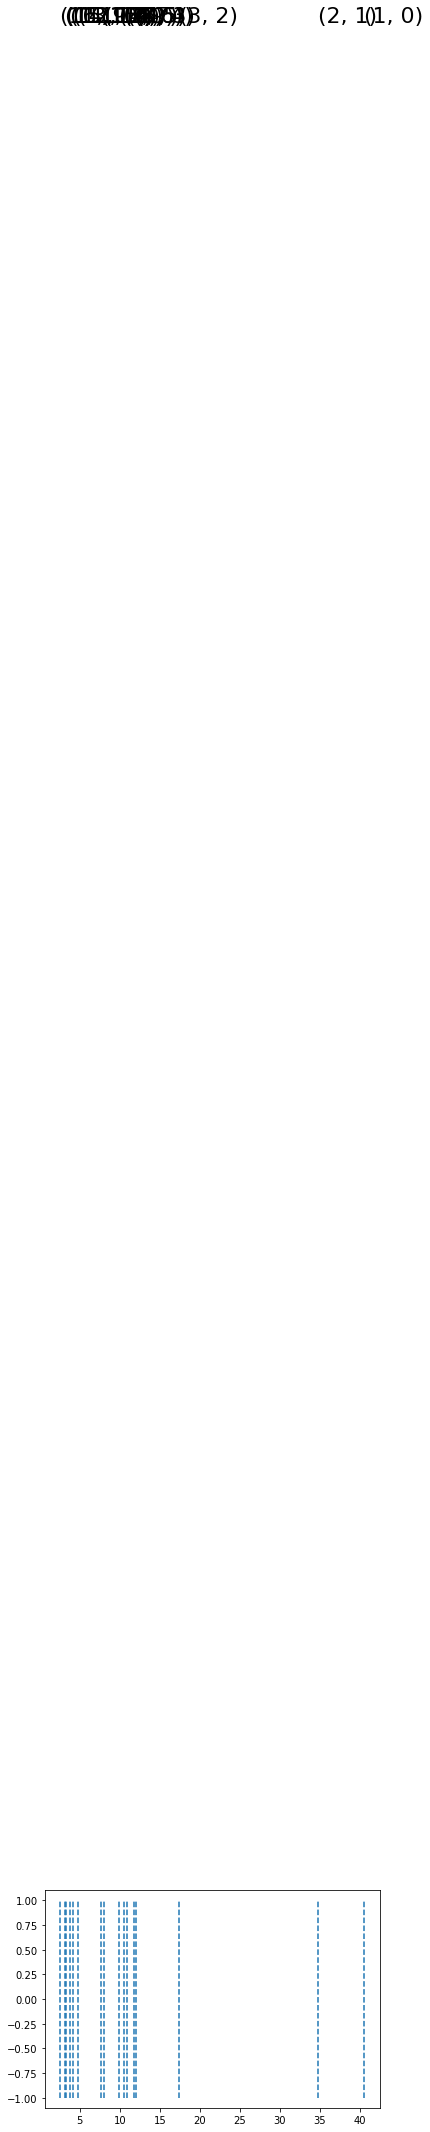

In [206]:
def analyze_path(W_true, Ws, max_gains):
    
    prev_B = np.zeros((n, n))
    
    for i, val in enumerate(max_gains):
        print(val)
        B = Ws[i].copy()
        B[B != 0] = 1
        diff = B.copy()
        diff[diff != prev_B] = -1
        prev_B = B        
        
        print(diff)
        print(np.array(np.where(diff == -1)))
        
        plt.vlines(val, -1, 1, linestyle = "--")
        plt.text(val, 20, (i + 1, i), fontsize = 22)
        
    plt.vlines(threshold_range[0], -1, 1, linestyle = '--', color = 'green')
    plt.vlines(threshold_range[1], -1, 1, linestyle = '--', color = 'green')
    
    plt.plot(max_gains, max_gains)
    
analyze_path(W_true, Ws, max_gains)